In [1]:
from ogb.linkproppred import PygLinkPropPredDataset
import networkx as nx
import os 
from torch_geometric.datasets import Planetoid
from torch_geometric.data import Data, Dataset, InMemoryDataset, DataLoader
import torch_geometric
from matplotlib import pyplot as plt
import torch  
from deepsnap.graph import Graph
from deepsnap.batch import Batch
from deepsnap.dataset import GraphDataset

/home/kit/aifb/cc7738/anaconda3/envs/subgraph-text/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_name = "ogbl-ddi"
dataset = PygLinkPropPredDataset(name=data_name, root="./dataset")

data = dataset[0]
g = torch_geometric.utils.to_networkx(data, to_undirected=True)


In [2]:
def visualize(G, color_map=None, seed=123):
  if color_map is None:
    color_map = '#c92506'
  plt.figure(figsize=(8, 8))
  nodes = nx.draw_networkx_nodes(G, pos=nx.spring_layout(G, seed=seed), \
                                 label=None, node_color=color_map, node_shape='o', node_size=150)
  edges = nx.draw_networkx_edges(G, pos=nx.spring_layout(G, seed=seed), alpha=0.5)
  if color_map is not None:
    plt.scatter([],[], c='#c92506', label='Nodes with label 0', edgecolors="black", s=140)
    plt.scatter([],[], c='#fcec00', label='Nodes with label 1', edgecolors="black", s=140)
    plt.legend(prop={'size': 13}, handletextpad=0)
  nodes.set_edgecolor('black')
  plt.show()

(0, {'node_feature': tensor([0.9850, 0.9334, 0.4620, 0.7821, 0.7584]), 'node_label': tensor(1)})


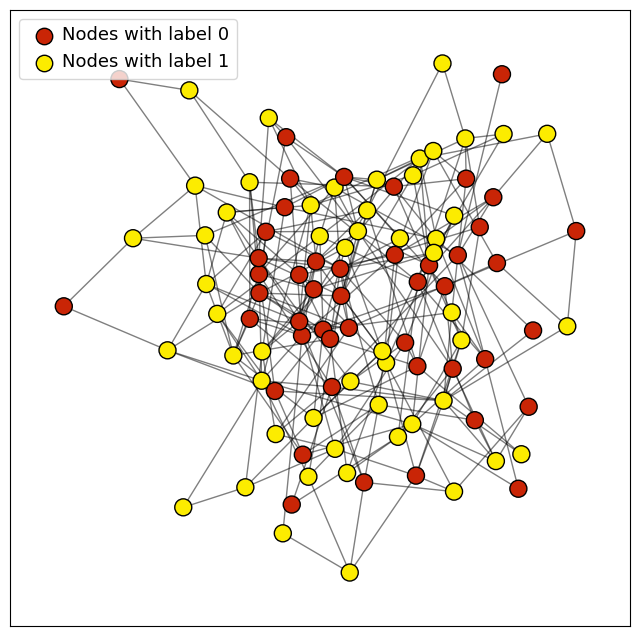

Graph(G=[], edge_index=[2, 524], edge_label_index=[2, 524], node_feature=[100, 5], node_label=[100], node_label_index=[100])
Node feature (node_feature) has shape torch.Size([100, 5]) and type torch.float32
Node label (node_label) has shape torch.Size([100]) and type torch.int64
Edge index (edge_index) has shape torch.Size([2, 524]) and type torch.int64
The DeepSNAP graph has <class 'networkx.classes.graph.Graph'> as the internal manupulation graph


In [3]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_nodes = 100
  p = 0.05
  seed = 100

  # Generate a networkx random graph
  G = nx.gnp_random_graph(num_nodes, p, seed=seed)

  # Generate some random node features and labels
  node_feature = {node : torch.rand([5, ]) for node in G.nodes()}
  node_label = {node : torch.randint(0, 2, ()) for node in G.nodes()}

  # Set the random features and labels to G
  nx.set_node_attributes(G, node_feature, name='node_feature')
  nx.set_node_attributes(G, node_label, name='node_label')

  # Print one node example
  for node in G.nodes(data=True):
    print(node)
    break

  color_map = ['#c92506' if node[1]['node_label'].item() == 0 else '#fcec00' for node in G.nodes(data=True)]

  # Visualize the graph
  visualize(G, color_map=color_map)

  # Transform the networkx graph into the deepsnap graph
  graph = Graph(G)

  # Print out the general deepsnap graph information
  print(graph)

  # DeepSNAP will convert node attributes to tensors
  # Notice the type of tensors
  print("Node feature (node_feature) has shape {} and type {}".format(graph.node_feature.shape, graph.node_feature.dtype))
  print("Node label (node_label) has shape {} and type {}".format(graph.node_label.shape, graph.node_label.dtype))

  # DeepSNAP will also generate the edge_index tensor
  print("Edge index (edge_index) has shape {} and type {}".format(graph.edge_index.shape, graph.edge_index.dtype))

  # Different from only storing tensors, deepsnap graph also references to the networkx graph
  # We will discuss why the reference will be helpful later
  print("The DeepSNAP graph has {} as the internal manupulation graph".format(type(graph.G)))

In [ ]:
nx.draw(g, node_size=10)

In [ ]:
data_name = "ogbl-ppa"
dataset = PygLinkPropPredDataset(name=data_name, root="./dataset")

data = dataset[0]
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
nx.draw(g, pos=nx.spring_layout(g))